## Predicting Heart Disease using ML

Using various python based machine learning and data science libraries to build model from Heart Disease UCI data

    Our approach
    (1) Problem Definition
    (2) Data
    (3) Evaluation
    (4) Features
    (5) Modelling
    (6) Experimentation

### (1) Problem Definition

Given clinical parameters about a patient can we predict whether or not they have heart disease ?

### (2) Data
Our data source is from UCI repository also alavialbe from Kaggle

### (3) Evaluation

#### If we can reach 95% accuracy in predicting whether or not patient has heart disease during the POC we will pursure the project

### (4) Features

    (1) age : age in years
    (2) sex : (1 = male; 0 = female)
    (3) cp : chest pain type
    (4) trestbps : resting blood pressure (in mm Hg on admission to       the hospital)
    (5) chol : serum cholestoral in mg/dl
    (6) fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    (7) restecg : resting electrocardiographic results
    (8) thalachmaximum heart rate achieved
    (9) exang : exercise induced angina (1 = yes; 0 = no)
    (10) oldpeak : ST depression induced by exercise relative to rest
    (11) slope: the slope of the peak exercise ST segment
    (12) ca : number of major vessels (0-3) colored by flourosopy
    (13) thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
    (14) target : 1 or 0

## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
## Load Data
df = pd.read_csv("data/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

#### Data Exploration

#### Checklist
    (1) What questions are being answered
    (2) Kinds of data we have and how to treat different types
    (3) Handling missing data
    (4) Outliers and how to treat them
    (5) Feature Engineering

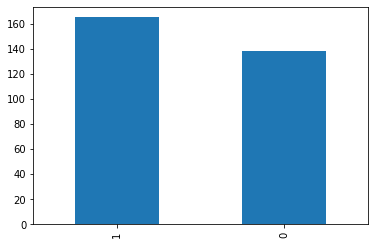

In [5]:
df['target'].value_counts().plot(kind='bar');

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
##Compare target with Sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


### Age vs Max heart rate for Heart Disease

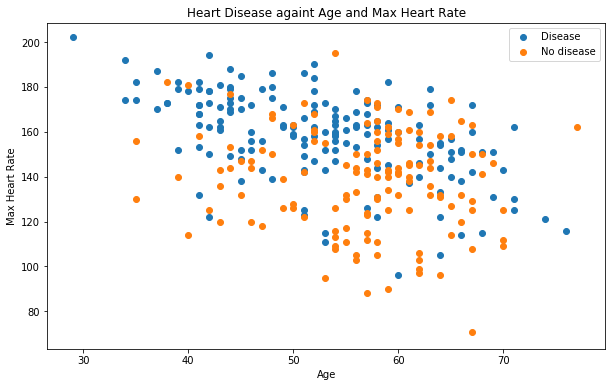

In [8]:
plt.figure(figsize=(10,6))

#Plot for patients who have heart disease
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1]
           );

#Plot for patients who don't have heart disease
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0]
           );

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Heart Disease againt Age and Max Heart Rate")
plt.legend(["Disease","No disease"]);

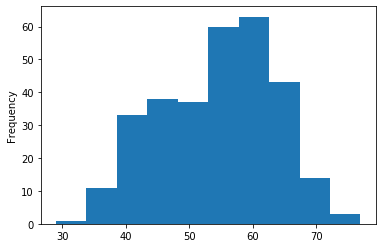

In [9]:
#Checking the distribution of age
df.age.plot.hist();

In [10]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


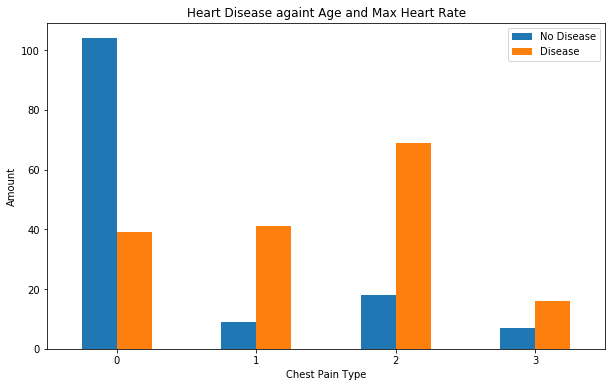

In [11]:
#Plot for patients who have heart disease
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6));
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");
plt.title("Heart Disease againt Age and Max Heart Rate");
plt.legend(["No Disease","Disease"]);
plt.xticks(rotation=0);

In [12]:
### Check correlation between dependent and independent variables

In [13]:
corr = df.corr()

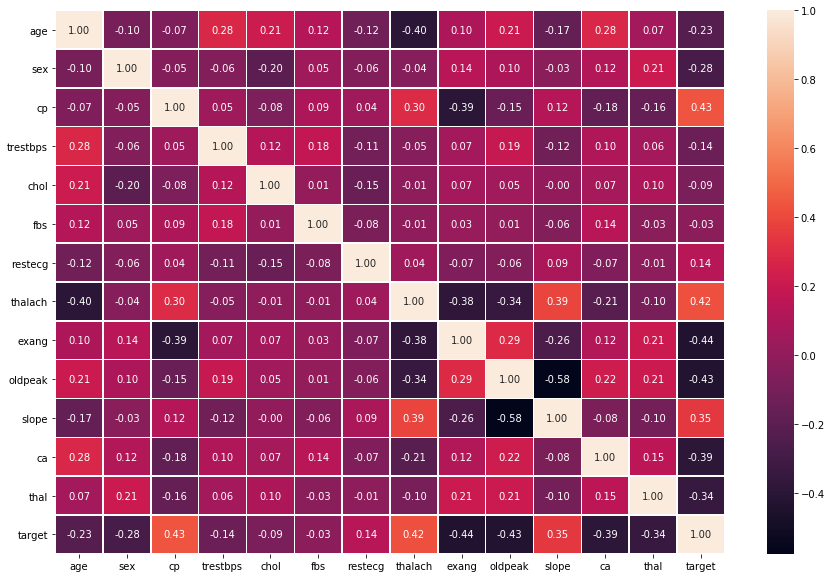

In [14]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr,annot=True,linewidth=0.5,fmt=".2f")

### (5) Modelling

In [15]:
X = df.drop("target",axis=1)
Y = df["target"]

In [16]:
np.random.seed(2)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

    (1) Logistic Regression
    (2) KNN
    (3) RandomForestClassifier

In [17]:
models = {"Logistic" : LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "RF": RandomForestClassifier()}

def fit_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(2)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name] = model.score(X_test,Y_test)
        
    return model_scores

In [18]:
scores = fit_score(models,X_train,X_test,Y_train,Y_test)

scores

C:\Users\SAN.000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic': 0.9016393442622951,
 'KNN': 0.7049180327868853,
 'RF': 0.9016393442622951}

### Model Comparision

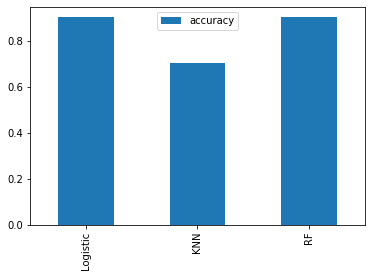

In [19]:
model_scores = pd.DataFrame(scores,index=["accuracy"])
model_scores.T.plot.bar();

### Improving model accuracy
    (1) hyperparameter Tunning
    (2) Feature Importance
    (3) Confusion matrix
    (4) Cross_validation
    (5) Precision
    (6) Recall
    (7) F1 Score
    (8) Classification report
    (9) ROC Curve
    (10) Area Under Curve

In [20]:
## Tunning KNN
train_scores = []
test_scores = []

# Create a list of KNN
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    
    test_scores.append(knn.score(X_test,Y_test))

In [21]:
train_scores

[1.0,
 0.7892561983471075,
 0.7396694214876033,
 0.7355371900826446,
 0.7396694214876033,
 0.7396694214876033,
 0.7231404958677686,
 0.7107438016528925,
 0.7066115702479339,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7024793388429752,
 0.6859504132231405,
 0.6735537190082644,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6735537190082644]

In [22]:
test_scores

[0.6065573770491803,
 0.639344262295082,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885]

MaxNN score: 77.05%


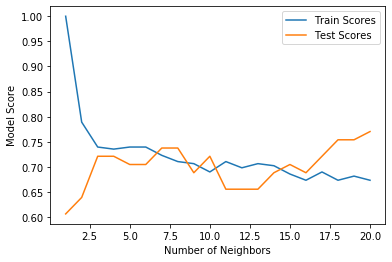

In [23]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")

plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"MaxNN score: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning using RandomizedSearchCV

    We will tune 
    (1) Logistic Regression()
    (2) RandomForestClassifier()  
using RandomSearchCV

In [26]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}

 # Create a hyperparameter grid for RandomForestClssifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
          "max_depth" : [None,3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}

In [28]:
# Tune LogisticRegression

np.random.seed(2)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               cv=5,
                               param_distributions=log_reg_grid,
                               n_iter=20,
                               verbose=True)

#Fit the model
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(X_test,Y_test)

0.9180327868852459

In [31]:
# Tune RandomForestClassifier

np.random.seed(2)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               cv=5,
                               param_distributions=rf_grid,
                               n_iter=20,
                               verbose=True)

#Fit the model
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [32]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': None}

In [33]:
rs_rf.score(X_test,Y_test)

0.8852459016393442

In [35]:
#Our Original Model shows that default LogisticRegession
#performs well even before tunning
model_scores

,Logistic,KNN,RF
accuracy,0.901639,0.704918,0.901639


### Hyperparameter tunning using GrdiSearchCV

In [39]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

#Setup gird hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                               cv=5,
                               param_grid=log_reg_grid,
                               verbose=True)

# Fit the model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [40]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [41]:
#Evaluate GrdiSearch LogisticRegression
gs_log_reg.score(X_test,Y_test)
#Just a bit more than normal LogisticRegressions

0.9180327868852459

In [42]:
#Original model scores without tuning
model_scores

,Logistic,KNN,RF
accuracy,0.901639,0.704918,0.901639


#### Evaluating tuned Classifiers
    ROC Curve and AUC Curve
    Confusion Matrix
    Classification Report
    Precision
    recall
    F1-Score

In [45]:
#Making predicitions
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

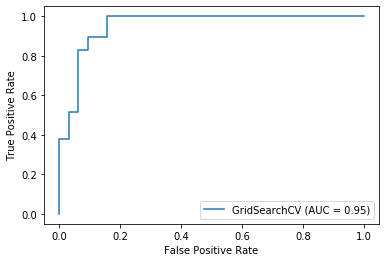

In [47]:
# ROC Curve
plot_roc_curve(gs_log_reg,X_test,Y_test)

Text(6.0, 0.5, 'Predicted label')

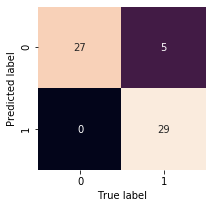

In [49]:
#Confusion Matrix
fig,ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrix(Y_test,y_preds),annot=True,cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [52]:
print(classification_report(Y_test,y_preds))
# these metrics are calculated on one split only
# Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.


              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



In [53]:
# we may need to calculate the metrics based on the cross-validation
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best params
clf = LogisticRegression(C=0.1082636733874054,solver="liblinear")

In [57]:
# Cross validated Accuracy
# we are passing entire X,Y as we are going through the cross validation, 
# which will do the splits automatically
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [58]:
# Cross validated Precisions
cv_pre = cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8182683982683983

In [59]:
# Cross validated Recall
cv_rec = cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9030303030303031

In [60]:
# Cross validated F1
cv_f1 = cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_rec)
cv_f1

0.9030303030303031

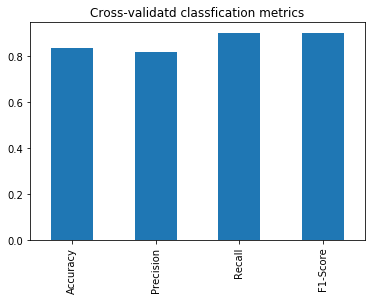

In [63]:
# Visualize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_pre,
                          "Recall" : cv_rec,
                          "F1-Score" : cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validatd classfication metrics", legend=False);

### Feature Importance

Which feature contribute more to the outcomes of the model

In [65]:
clf.fit(X_train,Y_train)

LogisticRegression(C=0.1082636733874054, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
clf.coef_

array([[ 0.00647008, -0.68304127,  0.6184325 , -0.01307299, -0.00299729,
        -0.01771121,  0.24452429,  0.0243036 , -0.38642002, -0.39287514,
         0.32969957, -0.51228764, -0.48958063]])

In [68]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.006470082865358063,
 'sex': -0.6830412718637527,
 'cp': 0.6184325005884739,
 'trestbps': -0.01307298669282449,
 'chol': -0.0029972895509600053,
 'fbs': -0.01771120825427197,
 'restecg': 0.24452428704317164,
 'thalach': 0.024303596828602662,
 'exang': -0.38642001993211905,
 'oldpeak': -0.39287514194720935,
 'slope': 0.3296995660327986,
 'ca': -0.5122876362201381,
 'thal': -0.4895806289809405}

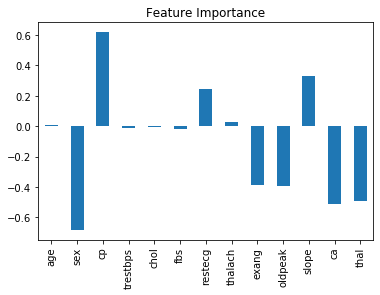

In [72]:
# These values come form model buildng finding is a sort of co-relation
# this can be compared to Correleation matrix
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = "Feature Importance",legend=False);

### (6) Experimentation

In [74]:
# Implementing catboos or XGboost
# tuning further
# Repeating the above process agin with differnt set of analysis